###### My goal on this kernel is to analyze videogames sales. So, for this purpose I would like to examine what are the top 100 of sold games in a global perspective. Then, I examine those games in terms of platform and genre according to each region. (?)

###### Also, I would like to center on the storytelling of the results. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
import matplotlib.pyplot as plt

In [2]:
vgsales = pd.read_csv('vgsales.csv')

In [3]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Here we can see that this dataset contains 11 columns, wich are:
      Rank: Ranking of overall sales. Integer.
      Name: Game name. Object
      Platform: Platform where the game was released (PC, PS3, WII, etc). Object
      Year: Year where the game was released. Float
      Genre: Genre of the game. Object.
      Publisher: Publisher of the game. Object
      NA_Sales: Sales in NA, expressed in millions. Float
      EU_Sales: Sales in Europe, expressed in millions. Float
      JP_Sales: Sales in Japan, expressed in millions. Float
      Other_Sales: Sales in the rest of the world, expressed in millions. Float
      Global_Sales: Worldwide sales, expressed in millions. Float

In [4]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###### Let's see wich are the 100 most sold games

In [5]:
# Lets create a dataset with the 100 most sold games on each different region

top100 = vgsales.head(100)

In [6]:
trace1 = go.Scatter(
                    x = top100.Rank,
                    y = top100.NA_Sales,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= top100.Name)

trace2 = go.Scatter(
                    x = top100.Rank,
                    y = top100.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= top100.Name)
trace3 = go.Scatter(
                    x = top100.Rank,
                    y = top100.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= top100.Name)
trace4 = go.Scatter(
                    x = top100.Rank,
                    y = top100.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'green',size=8),
                    text= top100.Name)
                    

data = [trace1, trace2,trace3,trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

As we can see, Wii Sports is (by far) the most sold game both in a global perspective as in North America and 
Europe. This can be cause by two things: It was the first game ever using motion sensor and it came in a bundle
with every Wii console sold in those 2 continents. (Wii has sold more than 101 millions of units around the world)

Wii Sports is a sports video game developed and published by Nintendo for the Wii video game console. The game was released in North America along with the Wii on November 19, 2006, and was released in Japan, Australia, and Europe the following month.The game is a collection of five sports simulations, designed to demonstrate the motion-sensing capabilities of the Wii Remote. The five sports included are tennis, baseball, bowling, golf and boxing. (resource:Wikipedia)

Top 10 ranks as it follows:

2- Super Mario Bros. 

3- Mario Kart Wii,

4- Wii Sports Resort,

5- Pokemon Red / Pokemon Blue,

6- Tetris,

7- New Super Mario Bros,

8- Wii Play,

9- New Super Mario Bros Wii ,

10-Duck Hunt

Now, lets see wich developer has more games into this top 100:

In [7]:
trace = go.Histogram(x=top100.Publisher,marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 100 Video Games Publishers',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

52 of these 100 games were published by Nintendo, siendo que la segunda que mas desarrollo es Activision, con "apenas" 14 juegos desarrollados. 

NINTENDO

Nintendo Co., Ltd. is a Japanese multinational consumer electronics and video game company headquartered in Kyoto ,founded on 23 September 1889 by Fusajiro Yamauchi. Nintendo is one of the world's largest video game companies by market capitalization, creating some of the best-known and top-selling video game franchises, such as Mario, The Legend of Zelda, and Pokémon. It originally produced handmade hanafuda playing cards. By 1963, the company had tried several small niche businesses, such as cab services and love hotels. Abandoning previous ventures in favor of toys in the 1960s, Nintendo developed into a video game company in the 1970s, ultimately becoming one of the most influential in the industry and Japan's third most-valuable company with a market value of over $85 billion in 2007.(source=Wikipedia)

In [14]:
##1. Drop the samples with missing values
##2. index needs to be reset after deleted samples
##3. updating rank column after reset

vgsales = vgsales.dropna()

vgsales = vgsales.reset_index(drop = True)

vgsales.loc[:, 'Rank'] = np.arange(vgsales.shape[0])+1

In [15]:
#As shown in vgsales.info, the year is showing floating point number. 
# We will change that to an integer for display purposes.

vgsales['Year'] = vgsales['Year'].astype(int)

In [16]:
game_list = pd.crosstab(vgsales['Platform'], 
            vgsales['Year'], margins=True, 
            margins_name="Total", 
           ).T
game_list

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,Total
Year,,,,,,,,,,,,,,,,,,,,,
1980,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1981,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46
1982,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
1983,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1985,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
1987,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1988,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


This table let us see that the gaming industry has been actively grown since 1994 with a peek in the years between 2006 - 2011. Then, it falls to levels from the start of the 00' decade. This can be caused due to the increasing cost (time and money) of developing newer games in the last decade. 

To clarify, lets make an histogram of this:

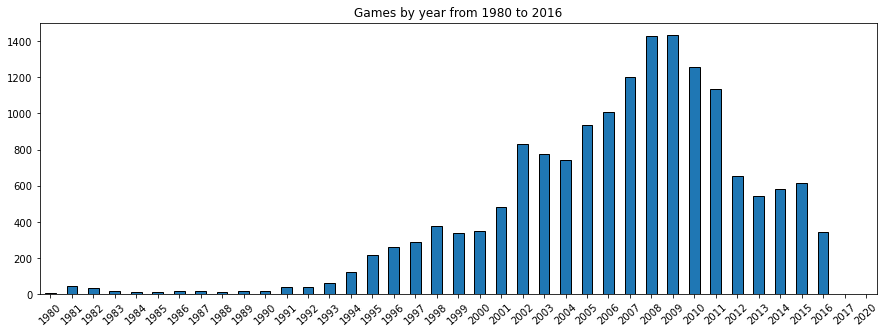

In [17]:
vgsales.groupby('Year')['Name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black'
)
plt.title('Games by year from 1980 to 2016')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

In [10]:
# Now, lets take a look at the sales of games for platform

vgsales.groupby('Platform')['Global_Sales'].sum().to_frame(
                                                        'Global_Sales').sort_values(
                                                        by='Global_Sales', ascending=False
                                                        ).head(10)

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


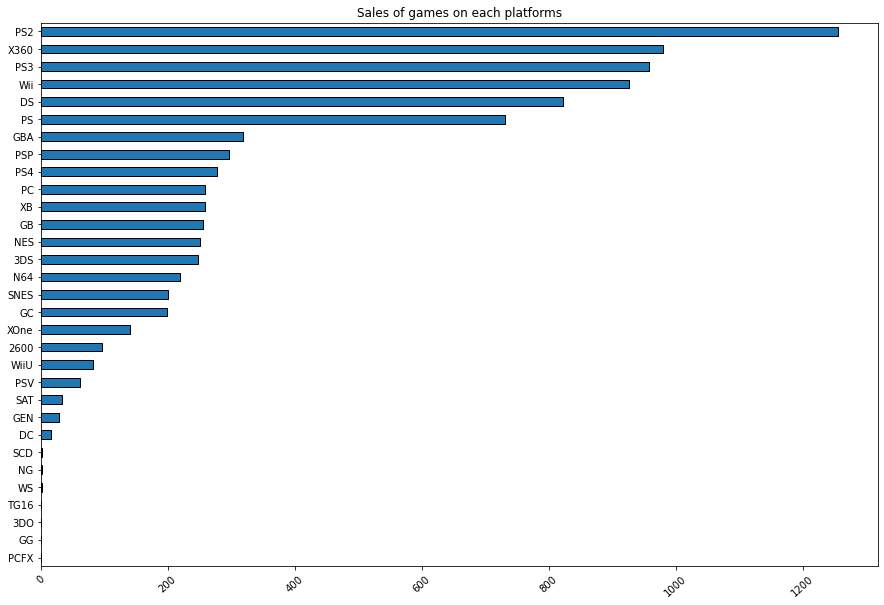

In [11]:
# Again, to clarify this table, lets use a histogram: 

vgsales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=True).plot(
            kind='barh', y='Global_Sales', figsize=(15,10), edgecolor='black'
)
plt.title('Sales of games on each platforms')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [12]:
from PIL import Image
myImage = Image.open("your_image_here");
myImage.show();

FileNotFoundError: [Errno 2] No such file or directory: 'your_image_here'

In [ ]:
# add image

my_image = PhotoImage 